# Predict Tg: Cross Validation
This notebook provides a demo of using the PolymerLearn package with PolymerGNN to predict Tg values from the dataset

In [1]:
import os
import torch
import pandas as pd
from polymerlearn.utils import get_Tg_add, GraphDataset

# Load data from local path:
data = pd.read_csv(os.path.join('../dataset', # May need to change path, depending on location of data 
            'pub_data.csv'))

add = get_Tg_add(data)

dataset = GraphDataset(
    data = data,
    structure_dir = '../Structures/AG/xyz',
    Y_target=['Tg'],
    test_size = 0.2,
    add_features=add
)

Now we'll instantiate our model, using the standard IV model that gets the best prediction scores.

In [2]:
from polymerlearn.models.gnn import PolymerGNN_Tg
from polymerlearn.utils import CV_eval

model_generator_kwargs = {
    'input_feat': 6,         # How many input features on each node; don't change this
    'hidden_channels': 32,   # How many intermediate dimensions to use in model
                            # Can change this ^^
    'num_additional': 1      # How many additional resin properties to include in the prediction
                            # Corresponds to the number in get_IV_add
}

optimizer_gen = torch.optim.AdamW
criterion = torch.nn.MSELoss()

all_predictions, all_y, all_inds = CV_eval(
    dataset = dataset,
    model_generator = PolymerGNN_Tg,
    optimizer_generator = optimizer_gen,
    criterion = criterion,
    model_generator_kwargs = model_generator_kwargs,
    optimizer_kwargs = {'lr': 0.0001, 'weight_decay':0.01},
    epochs = 800,
    batch_size = 64,
    verbose = 1,
    use_val = False
)

Fold: 1 	 Epoch: 0,                     	 Train r2: -1.6684 	 Train Loss: 162887.9332
Fold: 1 	 Epoch: 50,                     	 Train r2: 0.5463 	 Train Loss: 38196.1835
Fold: 1 	 Epoch: 100,                     	 Train r2: 0.7587 	 Train Loss: 17609.1716
Fold: 1 	 Epoch: 150,                     	 Train r2: 0.8521 	 Train Loss: 11173.8880
Fold: 1 	 Epoch: 200,                     	 Train r2: 0.5341 	 Train Loss: 40404.5831
Fold: 1 	 Epoch: 250,                     	 Train r2: 0.9223 	 Train Loss: 7898.8708
Fold: 1 	 Epoch: 300,                     	 Train r2: 0.8630 	 Train Loss: 10764.4727
Fold: 1 	 Epoch: 350,                     	 Train r2: 0.8232 	 Train Loss: 19898.6027
Fold: 1 	 Epoch: 400,                     	 Train r2: 0.9075 	 Train Loss: 6910.7299
Fold: 1 	 Epoch: 450,                     	 Train r2: 0.8683 	 Train Loss: 14309.6318
Fold: 1 	 Epoch: 500,                     	 Train r2: 0.8714 	 Train Loss: 10371.4283
Fold: 1 	 Epoch: 550,                     	 Train r2: 0.9

Note that the cross validation, while more stable than a simple train/test split, is relatively unstable, meaning you could get a wide range of scores for any given run.

Now we can plot the model predictions vs. errors:

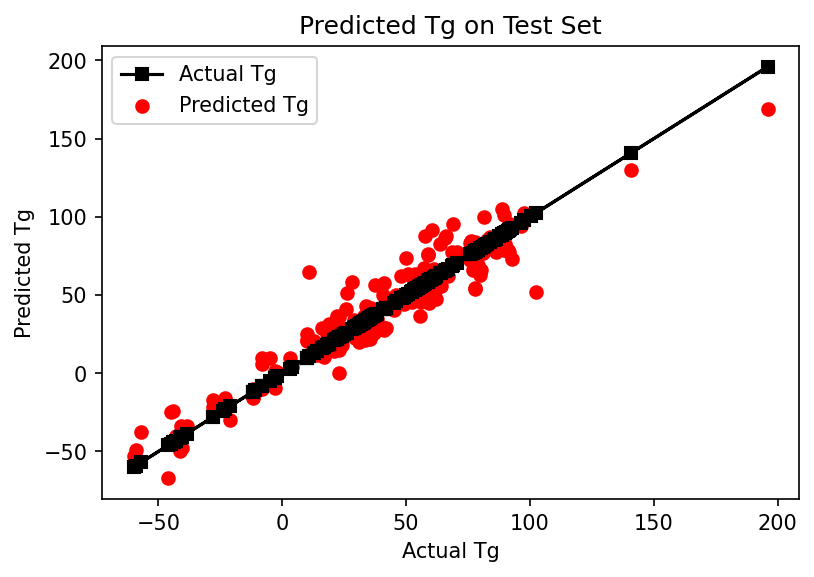

In [4]:
import matplotlib.pyplot as plt

Y = all_y

plt.figure(dpi=150)
plt.plot(Y, Y, marker = 's', c = 'black', label = 'Actual Tg')
plt.scatter(Y, all_predictions, c = 'red', label = 'Predicted Tg')
plt.xlabel('Actual Tg')
plt.ylabel('Predicted Tg')
plt.title('Predicted Tg on Test Set')
plt.legend()
plt.show()